### Part 1
*Propose a metric and/or algorithm to assess the potential efficiency of aggregating rides
from many vehicles into one, given the available data. Make realistic assumptions and any
necessary simplifications and state them.*

In order to assess the potential efficiency gains from aggregating rides, I estimated the rate-density of rides that meet some proximity criterion in origin-destination-time space.
I computed this estimate by simply binning the ride datapoints over a discretized space and time. From there, I calculated overall efficiencies by taking density-weighted averages.

The main limitation of this approach is that it does not consider the possibility of intra-ride pickups.
Consideration of intra-ride pickups would add considerable complexity because I would need to model the full route of the taxi rides, rather than just the origin and destination. 

The other major limititation comes from my choice of discretizing space according to the NYC taxi zone dataset. The taxi zones might be considered too large or oddly shaped to contribute to a faithful representation of aggregation opportunities. However, the taxi zones suffice to capture important features of the ride distribution and allow for a reasonable estimate for our efficiency metric. The same analysis could easily be done with different discretizations if desired at a cost increase logarithmic in the number of zones.


### Part 2
*Implement your proposed method and evaluate Manhattan’s overall efficiency using yellow
taxi data from the first full week (Monday-Sunday) in June 2016. Discuss how your method
would scale with more data; in other words, discuss the complexity of your implementation.*

First, let's consider a baseline worst-case scenario where rides are uniformly distributed. For example, there were roughly 2 million taxi rides within Manhattan during the week of 2016/06/06 - 2016/06/12.
If Manhattan were discretized into a grid of 100 boxes, and rides were uniformly distributed in origin, destination, and time, the rate-density of rides would be 1.2 rides per origin-destination per hour.
In other words, you would have to wait nearly two hours to aggregate two rides!
Fortunately, in reality rides are strongly clustered in time and space, so the density-weighted rate-density is much higher than this naive average.

To calculate the rate-density, the continuous pickup and dropoff coordinates and times need to be placed in discrete bins. Binning in time is easily done by grouping over the hour of pickup, but the spatial binning requires a search through the zones for each point. Fortunately, this search can be done in logarithmic time in the number of zones by using a tree-based data structure. The search process is efficiently implemented in the spatial join functionality of Geopandas. After the spatial join and grouping by time, we can simply take a density-weighted average of the rate-density over all combinations of origin, destination, and time, in order to get an overall efficiency for Manhattan, The final result is an average rate-density of 120 rides per origin-destination per hour, or roughly 100x the naive average.

The limiting factor in this process is the spatial join, which is linear in taxi rides and logarithmic in zones. The whole process takes a few minutes in a standard Kaggle kernel, so there is plenty of room to scale up in rides and zones.


### Part 3
*Based on your implementation in the previous question, use visualizations to show how
efficiency varies with time and location. Discuss any potential business implications based on
your findings.*

The 100x increase in average density over a naive average indicates the importance of clustering in ride-space. Now, we will look more closely at the actual patterns of clustering in space and time.

#### Figure 1: Ride Density Over Time
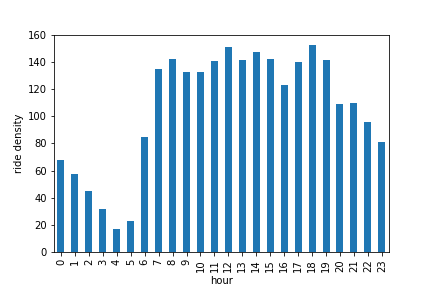

Figure 1 shows the ride density for each hour of the day, averaged over every day of the week and every origin-destination. The density is relatively flat during daytime hours, but shows a sharp decrease from around midnight to 5AM. The business insight here is an obvious one: there's much more opportunity to aggregate rides during the day than in the middle of the night.

#### Figure 2: Density by Pickup Location
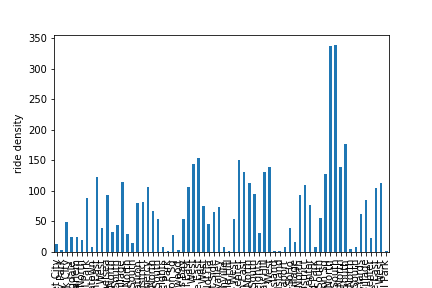
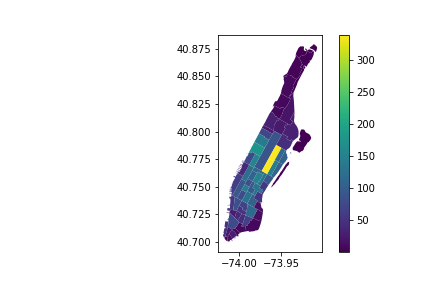

Figure 2 shows the ride density for each origin location, averaged over all times and destinations. There is considerable spread in the density across origin zones, with a couple of outliers near 300 rides per, and a handful close to zero, with the rest in the range of 30-150. The choropleth map shows that the low density zones are concentrated at the northern and southern ends of Manhattan, with the high density zones around midtown and Central Park. The data shows that there is a significant difference in potential aggregation efficiency based on location. However, this data could be influenced by the choice of spatial discretization, so further analysis would need to be done.

#### Figure 3: Ride Density over Destinations for a Specific Origin
##### a) Morningside Heights
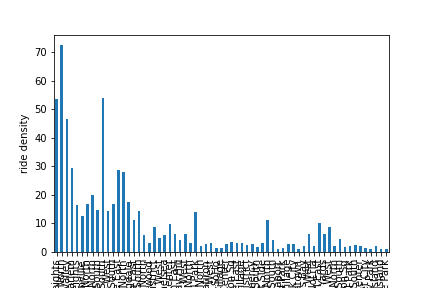
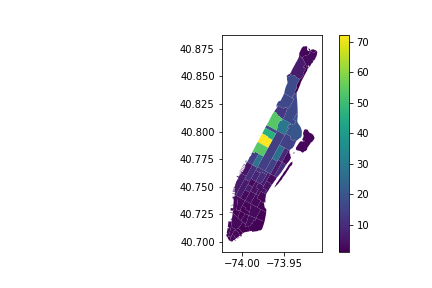
##### b) Battery Park
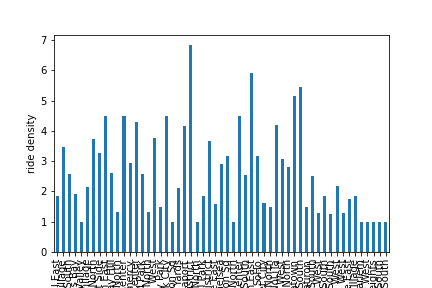
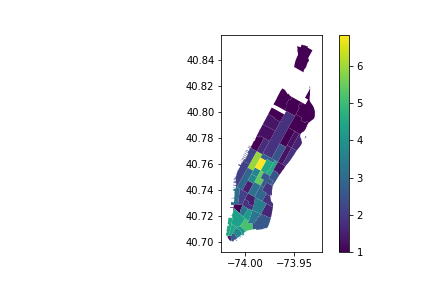
##### c) Upper East Side South
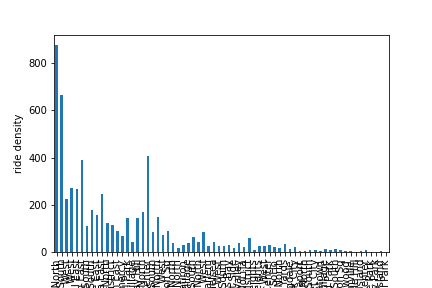
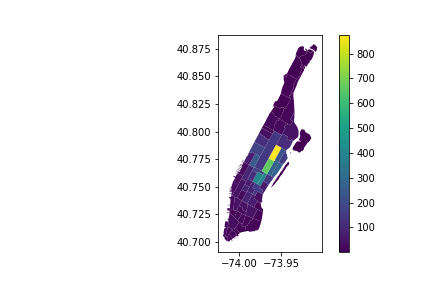

Figure 3 shows the ride density averaged over time, over destinations for a few different origin zones. The plots show that density is strongly concentrated within close proximity to the origin zone. This trend is not as directly applicable to determining resource allocation, but it could be used to determine if it's worth waiting for more riders once one user has selected a certain origin and destination, for example.